**Machine Learning**

- Classify the customers that has a high probability of exiting

**Conclusion**

- Random Forest Classifier tuned is very good model in machine learning for Bank Customer Churn Classification
- More check file : BankAccountMachineLearning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Preprocessing**

In [3]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

**Splitting Imbalance Data**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(columns='Exited')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90, stratify = y,random_state = 42)

**Checking Imbalance Dataset**

In [6]:
df_train = pd.concat([X_train, y_train], axis=1)

In [7]:
df_train['Exited'].value_counts()

0    7167
1    1833
Name: Exited, dtype: int64

**Over Sampled**

In [8]:
from sklearn.utils import resample

In [9]:
exited_no = df_train[df_train['Exited'] == 0]
exited_yes = df_train[df_train['Exited'] == 1]

exited_oversample = resample(exited_yes,
                           replace=True,
                           n_samples = len(exited_no),
                           random_state = 42)

In [10]:
df_OverSampled = pd.concat([exited_no, exited_oversample])

df_OverSampled['Exited'].value_counts()

1    7167
0    7167
Name: Exited, dtype: int64

In [11]:
df = df_OverSampled

**Machine Learning Preprocessing**

In [12]:
X_train = df.drop(columns='Exited')
y_train = df['Exited']

**Machine Learning**

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [14]:
cat_columns = ["Gender", "Geography"]

num_columns = ["Age", "CreditScore", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

In [15]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

numerical_pipeline_s = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

preprocessor_s = ColumnTransformer([
    ('numeric', numerical_pipeline_s, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

In [16]:
pipe_Log = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ("prep", preprocessor_s),
    ("algo", KNeighborsClassifier())
])

In [17]:
pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

pipe_SVC = Pipeline([
    ("prep", preprocessor_s),
    ("algo", SVC(max_iter = 10))
])

In [18]:
pipe_Log.fit(X_train, y_train)
pipe_KNN.fit(X_train, y_train)
pipe_RF.fit(X_train, y_train)
pipe_SVC.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CreditScore',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImp

In [19]:
y_pred_Logtr = pipe_Log.predict(X_train)
acc_Logtr = accuracy_score(y_train, y_pred_Logtr)
prec_Logtr = precision_score(y_train, y_pred_Logtr)
rec0_Logtr = recall_score (y_train, y_pred_Logtr, pos_label=0)
rec1_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=1)
f1_Logtr = f1_score(y_train, y_pred_Logtr)

y_pred_KNNtr = pipe_KNN.predict(X_train)
acc_KNNtr = accuracy_score(y_train, y_pred_KNNtr)
prec_KNNtr = precision_score(y_train, y_pred_KNNtr)
rec0_KNNtr = recall_score (y_train, y_pred_KNNtr, pos_label=0)
rec1_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=1)
f1_KNNtr = f1_score(y_train, y_pred_KNNtr)

y_pred_RFtr = pipe_RF.predict(X_train)
acc_RFtr = accuracy_score(y_train, y_pred_RFtr)
prec_RFtr = precision_score(y_train, y_pred_RFtr)
rec0_RFtr = recall_score (y_train, y_pred_RFtr, pos_label=0)
rec1_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=1)
f1_RFtr = f1_score(y_train, y_pred_RFtr)

y_pred_SVCtr = pipe_SVC.predict(X_train)
acc_SVCtr = accuracy_score(y_train, y_pred_SVCtr)
prec_SVCtr = precision_score(y_train, y_pred_SVCtr)
rec0_SVCtr = recall_score (y_train, y_pred_SVCtr, pos_label=0)
rec1_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=1)
f1_SVCtr = f1_score(y_train, y_pred_SVCtr)


y_pred_Logts = pipe_Log.predict(X_test)
acc_Logts = accuracy_score(y_test, y_pred_Logts)
prec_Logts = precision_score(y_test, y_pred_Logts)
rec0_Logts = recall_score (y_test, y_pred_Logts, pos_label=0)
rec1_Logts = recall_score(y_test, y_pred_Logts, pos_label=1)
f1_Logts = f1_score(y_test, y_pred_Logts)

y_pred_KNNts = pipe_KNN.predict(X_test)
acc_KNNts = accuracy_score(y_test, y_pred_KNNts)
prec_KNNts = precision_score(y_test, y_pred_KNNts)
rec0_KNNts = recall_score (y_test, y_pred_KNNts, pos_label=0)
rec1_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=1)
f1_KNNts = f1_score(y_test, y_pred_KNNts)

y_pred_RFts = pipe_RF.predict(X_test)
acc_RFts = accuracy_score(y_test, y_pred_RFts)
prec_RFts = precision_score(y_test, y_pred_RFts)
rec0_RFts = recall_score (y_test, y_pred_RFts, pos_label=0)
rec1_RFts = recall_score(y_test, y_pred_RFts, pos_label=1)
f1_RFts = f1_score(y_test, y_pred_RFts)

y_pred_SVCts = pipe_SVC.predict(X_test)
acc_SVCts = accuracy_score(y_test, y_pred_SVCts)
prec_SVCts = precision_score(y_test, y_pred_SVCts)
rec0_SVCts = recall_score (y_test, y_pred_SVCts, pos_label=0)
rec1_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=1)
f1_SVCts = f1_score(y_test, y_pred_SVCts)

In [20]:
data = {
    "LogReg Train" : [acc_Logtr, prec_Logtr, rec1_Logtr, f1_Logtr],
    "LogReg Test" : [acc_Logts, prec_Logts, rec1_Logts, f1_Logts],
    "KNN Train" : [acc_KNNtr, prec_KNNtr, rec1_KNNtr, f1_KNNtr],
    "KNN Test" : [acc_KNNts, prec_KNNts, rec1_KNNts, f1_KNNts],
    "RF Train" : [acc_RFtr, prec_RFtr, rec1_RFtr, f1_RFtr],
    "RF Test" : [acc_RFts, prec_RFts, rec1_RFts, f1_RFts],
    "SVC Train" : [acc_SVCtr, prec_SVCtr, rec1_SVCtr, f1_SVCtr],
    "SVC Test" : [acc_SVCts, prec_SVCts, rec1_SVCts, f1_SVCts]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test,SVC Train,SVC Test
Accuracy,0.662969,0.648000,0.898981,0.729000,1.0,0.840000,0.497140,0.774000
Precision,0.659389,0.323810,0.849872,0.397554,1.0,0.634146,0.430034,0.156250
Recall,0.674201,0.666667,0.969164,0.637255,1.0,0.509804,0.017581,0.024510
F1 Score,0.666713,0.435897,0.905606,0.489642,1.0,0.565217,0.033780,0.042373


**Hyperparameter Tuning**

Parameter

In [21]:
Param_Log = {
    "algo__penalty" : ["l1","l2","elasticnet","none"],
    "algo__class_weight" : [dict, "balanced"],
    "algo__max_iter" : [10,100,500],
    "algo__intercept_scaling" : [1,5,10]
}

Param_KNN = {
    "algo__n_neighbors" : [1,3,5],
    "algo__weights" : ["distance","uniform"],
    "algo__leaf_size" : [1,5,15]
}

Param_RF = {
    "algo__n_estimators" : [50,300],
     #"max_depth" : [8],
     "algo__min_samples_split" : [2,5],
     "algo__min_samples_leaf" : [1,2]
}

Param_SVC = {
    "algo__max_iter" : [10,100],
    "algo__kernel" : ['poly', 'rbf', 'sigmoid']
}

In [22]:
# pipe_Log.get_params()
# pipe_KNN.get_params()
# pipe_RF.get_params()
# pipe_SVC.get_params()

In [23]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression Tuning**

In [24]:
model_tuned_1 = GridSearchCV(estimator=pipe_Log, param_grid=Param_Log, cv = 3, n_jobs=-1, verbose=1)

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned recall LogReg Tuned Train : ', recall_score(y_train, y_tune_1_train))
print('Tuned recall LogReg Tuned Test : ', recall_score(y_test, y_tune_1_test))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   14.1s finished


Best Score : 0.6621319938607506
Tuned recall LogReg Tuned Train :  0.6742011999441886
Tuned recall LogReg Tuned Test :  0.6666666666666666


**KNN Tuning**

In [25]:
model_tuned_2 = GridSearchCV(estimator=pipe_KNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1)

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2_test))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    9.7s finished


Best Score : 0.9037951723175667
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.45098039215686275


**Random Forest Tuning**

In [26]:
model_tuned_3 = GridSearchCV(estimator=pipe_RF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1)

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned recall RF Tuned Train : ', recall_score(y_train, y_tune_3_train))
print('Tuned recall RF Tuned Test : ', recall_score(y_test, y_tune_3_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   20.1s finished


Best Score : 0.9373517510813452
Tuned recall RF Tuned Train :  1.0
Tuned recall RF Tuned Test :  0.5049019607843137


**SVC Tuning**

In [27]:
model_tuned_4 = GridSearchCV(estimator=pipe_SVC, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1)

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.3s finished


Best Score : 0.6089019115389982
Tuned recall SVC Tuned Train :  0.15222547788474955
Tuned recall SVC Tuned Test :  0.09313725490196079


**Evaluation Metrics Tuned**

In [28]:
acc_Logtr_tuned = accuracy_score(y_train, y_tune_1_train)
prec_Logtr_tuned = precision_score(y_train, y_tune_1_train)
rec0_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=0)
rec1_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=1)
f1_Logtr_tuned = f1_score(y_train, y_tune_1_train)

acc_KNNtr_tuned = accuracy_score(y_train, y_tune_2_train)
prec_KNNtr_tuned = precision_score(y_train, y_tune_2_train)
rec0_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=0)
rec1_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=1)
f1_KNNtr_tuned = f1_score(y_train, y_tune_2_train)

acc_RFtr_tuned = accuracy_score(y_train, y_tune_3_train)
prec_RFtr_tuned = precision_score(y_train, y_tune_3_train)
rec0_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=0)
rec1_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=1)
f1_RFtr_tuned = f1_score(y_train, y_tune_3_train)

acc_SVCtr_tuned = accuracy_score(y_train, y_tune_4_train)
prec_SVCtr_tuned = precision_score(y_train, y_tune_4_train)
rec0_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=0)
rec1_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=1)
f1_SVCtr_tuned = f1_score(y_train, y_tune_4_train)


acc_Logts_tuned = accuracy_score(y_test, y_tune_1_test)
prec_Logts_tuned = precision_score(y_test, y_tune_1_test)
rec0_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=0)
rec1_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=1)
f1_Logts_tuned = f1_score(y_test, y_tune_1_test)

acc_KNNts_tuned = accuracy_score(y_test, y_tune_2_test)
prec_KNNts_tuned = precision_score(y_test, y_tune_2_test)
rec0_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=0)
rec1_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=1)
f1_KNNts_tuned = f1_score(y_test, y_tune_2_test)

acc_RFts_tuned = accuracy_score(y_test, y_tune_3_test)
prec_RFts_tuned = precision_score(y_test, y_tune_3_test)
rec0_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=0)
rec1_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=1)
f1_RFts_tuned = f1_score(y_test, y_tune_3_test)

acc_SVCts_tuned = accuracy_score(y_test, y_tune_4_test)
prec_SVCts_tuned = precision_score(y_test, y_tune_4_test)
rec0_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=0)
rec1_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=1)
f1_SVCts_tuned = f1_score(y_test, y_tune_4_test)

In [29]:
data = {
    "LogReg Tuned Train" : [acc_Logtr_tuned, prec_Logtr_tuned, rec1_Logtr_tuned, f1_Logtr_tuned],
    "LogReg Tuned Test" : [acc_Logts_tuned, prec_Logts_tuned, rec1_Logts_tuned, f1_Logts_tuned],
    "KNN Tuned Train" : [acc_KNNtr_tuned, prec_KNNtr_tuned, rec1_KNNtr_tuned, f1_KNNtr_tuned],
    "KNN Tuned Test" : [acc_KNNts_tuned, prec_KNNts_tuned, rec1_KNNts_tuned, f1_KNNts_tuned],
    "RF Tuned Train" : [acc_RFtr_tuned, prec_RFtr_tuned, rec1_RFtr_tuned, f1_RFtr_tuned],
    "RF Tuned Test" : [acc_RFts_tuned, prec_RFts_tuned, rec1_RFts_tuned, f1_RFts_tuned],
    "SVC Tuned Train" : [acc_SVCtr_tuned, prec_SVCtr_tuned, rec1_SVCtr_tuned, f1_SVCtr_tuned],
    "SVC Tuned Test" : [acc_SVCts_tuned, prec_SVCts_tuned, rec1_SVCts_tuned, f1_SVCts_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Tuned Train,LogReg Tuned Test,KNN Tuned Train,KNN Tuned Test,RF Tuned Train,RF Tuned Test,SVC Tuned Train,SVC Tuned Test
Accuracy,0.662969,0.648000,1.0,0.784000,1.0,0.839000,0.533417,0.724000
Precision,0.659389,0.323810,1.0,0.469388,1.0,0.631902,0.640634,0.172727
Recall,0.674201,0.666667,1.0,0.450980,1.0,0.504902,0.152225,0.093137
F1 Score,0.666713,0.435897,1.0,0.460000,1.0,0.561308,0.245998,0.121019


**Confusion Matrix**

In [30]:
cmLog = confusion_matrix(y_test, y_tune_1_test, labels=[1, 0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, y_tune_2_test, labels=[1, 0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, y_tune_3_test, labels=[1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC = confusion_matrix(y_test, y_tune_4_test, labels=[1, 0])
dfSVC = pd.DataFrame(data=cmSVC, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

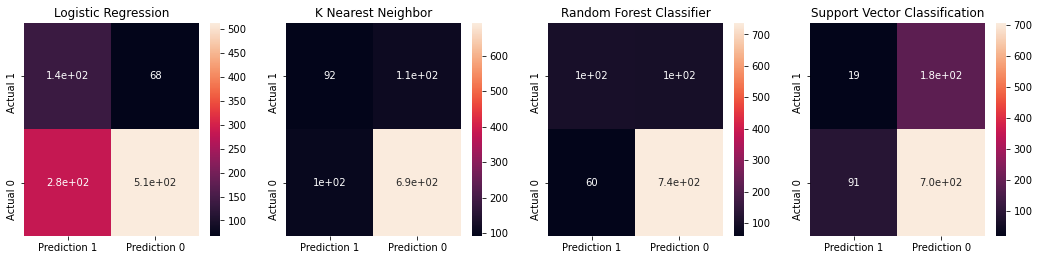

In [31]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True)
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True)
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF, annot=True)
plt.title('Random Forest Classifier')

plt.subplot(4,4,4)
sns.heatmap(dfSVC, annot=True)
plt.title('Support Vector Classification')

plt.show()